7 October 2020
Linear Algebra
Introduction
In this assignment, we demonstrate matrix and vector operations with numpy.

For the following exercises, we strive to use numpy vector/matrix operations, instead of for loop over a numpy array unless given explicit instructions to do so!

Important Numpy Notes:
In an numpy array, a row vector is defined as:

a = np.array([[1, 2, 3]])
The shape of a is (1, 3). There is one row and multiple columns.

A column vector is defined as:

b = np.array([[1], [2], [3]])
The shape of b is (3, 1). There are three rows, and one column.

Check the shape of all the vectors throughout the exercise. If the shape is missing a value, i.e. (3,) or (,3), use np.newaxis or np.reshape to restore the correct dimensions.



Basic
Part 1: Markov Chains
A Markov Chain is a simple model for a system that transitions between states, where there is some randomness involved in the transitions. If, for example, the system has three states (on, off, and idle, for example), then the probabilities from transitioning from one state to another can be encoded as a three by three matrix of probabilities with some simple properties, this is called a stochastic matrix.

The probability of entering a certain state depends only on the last state occupied and the transition probabilities in the stochastic matrix, not on the entire history of states. This is called the markov property, and it makes Markov Chains particularly simple and appealing models.

Suppose that the 2004 state of land use in a city of 60 mi^2 of built-up area is:

In 2004:
   
C (Commercially Used): 25%
I (Industrially Used): 20%
R (Residentially Used): 55%
Find the state of land use in 2009 and 2014, assuming that the transition probabilities for 5-year intervals are given by the matrix A and remain practically the same over the time considered.





In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
A=np.array([[0.7,0.1,0],[0.2,0.9,0.2],[0.1,0,0.8]])

In [5]:
state_04=np.array([0.25,0.2,0.55])

In [6]:
state_09=A@state_04
state_09

array([0.195, 0.34 , 0.465])

In [7]:
state_14=A@state_09
state_14

array([0.1705, 0.438 , 0.3915])

Suppose that all of the land in the city starts as residential. Use the transition matrix to plot how the usage of the other three land types evolves over time.

Do the same as above for both an all industrial and an all commercial starting point. How does the long term makeup of the city differ for different starting points?



In [8]:
state_00_R=np.array([0,0,1])

In [9]:
mega_array=np.array([A,A@A,A@A@A,A@A@A@A])
print(mega_array)


[[[0.7    0.1    0.    ]
  [0.2    0.9    0.2   ]
  [0.1    0.     0.8   ]]

 [[0.51   0.16   0.02  ]
  [0.34   0.83   0.34  ]
  [0.15   0.01   0.64  ]]

 [[0.391  0.195  0.048 ]
  [0.438  0.781  0.438 ]
  [0.171  0.024  0.514 ]]

 [[0.3175 0.2146 0.0774]
  [0.5066 0.7467 0.5066]
  [0.1759 0.0387 0.416 ]]]


In [10]:
data=mega_array*state_00_R



In [11]:
state_05_R=A@state_00_R
print(state_05_R)

[0.  0.2 0.8]


In [12]:
state_10_R=A@state_05_R
print(state_10_R)

[0.02 0.34 0.64]


In [13]:
state_15_R=A@state_10_R
print(state_15_R)

[0.048 0.438 0.514]


In [14]:
state_00_C=np.array([1,0,0])

In [15]:
state_05_C=A@state_00_C
print(state_05_C)

[0.7 0.2 0.1]


In [16]:
state_10_C=A@state_05_C
print(state_10_C)

[0.51 0.34 0.15]


In [17]:
state_15_C=A@state_10_C
print(state_15_C)

[0.391 0.438 0.171]


In [18]:
state_00_I=np.array([0,1,0])

In [19]:
state_05_I=A@state_00_I
print(state_05_I)

[0.1 0.9 0. ]


In [20]:
state_10_I=A@state_05_I
print(state_10_I)

[0.16 0.83 0.01]


In [21]:
state_15_I=A@state_10_I
print(state_15_I)

[0.195 0.781 0.024]


In [28]:
R_mat = np.array([state_00_R, state_05_R, state_10_R, state_15_R])
print(R_mat)
C_mat = np.array([state_00_C, state_05_C, state_10_C, state_15_C])
I_mat = np.array([state_00_I, state_05_I, state_10_I, state_15_I])

[[0.    0.    1.   ]
 [0.    0.2   0.8  ]
 [0.02  0.34  0.64 ]
 [0.048 0.438 0.514]]


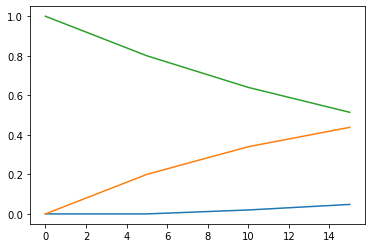

In [29]:
plt.plot(np.arange(0, 16, 5), R_mat)

[[1.    0.    0.   ]
 [0.7   0.2   0.1  ]
 [0.51  0.34  0.15 ]
 [0.391 0.438 0.171]]


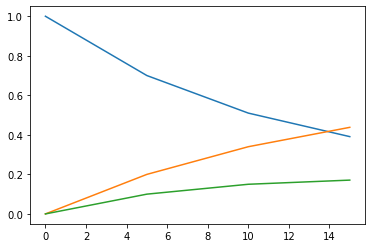

In [32]:
plt.plot(np.arange(0, 16, 5), C_mat)
print(C_mat)

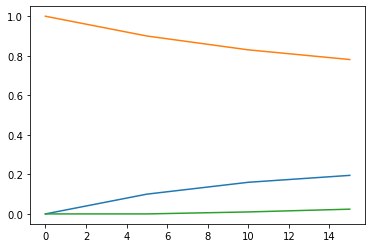

In [31]:
plt.plot(np.arange(0, 16, 5), I_mat)

In [23]:
Advanced
Part 2: Iris
This following question uses the iris dataset. Load the data in with the following code.

iris = pd.read_csv('data/iris.txt')
data = iris[['SepalWidth', 'SepalLength']].values
Make a scatter plot of sepal width vs sepal length (you will have to explore the iris object to extract this information).

Compute the mean vector (column-wise) of the data matrix. The shape of the mean vector should be (1, 2)

Plot the mean sepal width and sepal length vector on the scatter plot in 1.


Write a function (euclidean_dist) to calculate the euclidean distance between two column vectors (not row vector). Your function should check if the vectors are column vectors and the shape of the two vectors are the same .

Write a function (cosine_sim) to calculate the cosine of the angle of separation between two column vectors.

Write a function that would loop through all the data points in a given matrix and calculate the given distance metric between each of the data point and the mean vector.

Input of the function:

Data matrix as an ndarray
Function to compute distance metric (Euclidean / Cosine Similarity)
Output of the function:

An array of distances.
Use the function to compute Euclidean Distance and Cosine Similarity between each of the data points and the mean of the data points. You should be able to call the function in this manner:

euclidean_dists = compute_dist(iris_data, euclidean_dist)
cosine_sims = compute_dist(iris_data, cosine_sim)
Plot histograms of the euclidean distances and cosine similarities using only sepal width and sepal length.





SyntaxError: invalid syntax (<ipython-input-23-7fc044901ab3>, line 2)

In [40]:
iris = pd.read_csv('/Users/kaciewebster/Documents/dsi/week1/linear-algebra/data/iris.txt')
data = iris[['SepalWidth', 'SepalLength']].values

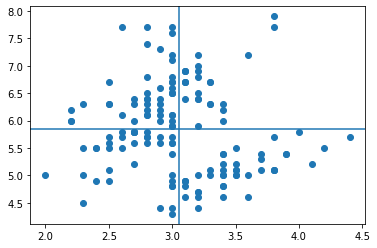

In [42]:
plt.scatter(data[:, 0], data[:, 1])
plt.axvline(x=3.054)
plt.axhline(y=5.843)

In [41]:
data.mean(axis=0)

array([3.054     , 5.84333333])

In [55]:
def euclidean_dist(col_1, col_2):
    if col_1.shape == col_2.shape and len(col_1.shape) == 1:
        sq_diff = (col_1-col_2)**2
        return np.sqrt(sum(sq_diff))
    else:
        print("Unequal columns.")
    

In [56]:
print(euclidean_dist(data[:, 0], data[:, 1]))

36.17927583575992


In [57]:
def cosine_sim(col_1, col_2):
    return np.dot(col_1, col_2)/(np.linalg.norm(col_1)*np.linalg.norm(col_2))

In [58]:
print(cosine_sim(data[:, 0], data[:, 1]))

0.9782631448152311


In [ ]:
def compute_dist(data, function):
    return function(data)

In [ ]:
Extra Credit
Part 3: Implementing the PageRank Algorithm
The Page Rank Algorithm is used by Google Search (in their early days) to rank websites in their search engine in terms of the importance of webpages. More about PageRank

We will implement PageRank on this simple network of websites.


In the above image:

Each node is a web page
Each directed edge corresponds to one page referencing the other
These web pages correspond to the states our Markov chain can be in
Assume that the model of our chain is that of a random surfer/walker.
In this model, we transition from one web page (state) to the next with equal probability (to begin). Or rather we randomly pick an outgoing edge from our current state. Before we can do any sort of calculation we need to know how we will move on this Markov Chain.

Create an numpy ndarray representing the transition probabilities between nodes for the above network (in the image). The position i, j in the matrix corresponds to the probability of going from node i to node j.

Now that we have a transition matrix, the next step is to iterate on this from one page to the next (like someone blindly navigating the internet) and see where we end up. The probability distribution for our random surfer can be described in this matrix notation as well (or vector rather).

Initialize a vector for the probability of where our random surfer is. It will be a vector with length equal to the number of pages. Initialize it to be equally probable to start on any page (i.e. you start randomly in a state on the chain).

To take a step on the chain, simply matrix multiple our user vector by the transition matrix. After one iteration, what is the most likely location for your random surfer?

Plot how the probabilities change. Iterate the matrix through the first ten steps. At each step create a bar plot of the surfers probability vector.

This time to compute the stationary distribution, we can use numpy's matrix operations. Using the function for calculating eigenvectors compute the stationary distribution (page rank). Is it the same as what you found from above? What is it's eigenvalue?

Hint:

The stationary state is represented by the real form of the left (first) eigenvector
The left eigenvector obtained from numpy.linalg.eig has to be normalized